In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
df=pd.read_csv("./ecg_autoencoder_dataset.csv",header=None)

In [9]:
X = df.drop([140], axis = 1)
y = df[140]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [17]:
encoder=Sequential([
    Input(shape=(X_train.shape[1],)), # Use x_train.shape[1] to get the number of features
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
])

In [18]:

decoder=Sequential([
    Input(shape=(16,)),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(X_train.shape[1],activation='linear')
])

In [19]:
autoencoder=Sequential([
    encoder,
    decoder
])

In [24]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [30]:
history=autoencoder.fit(X_train,X_train,epochs=100,batch_size=32,shuffle=True,validation_data=(X_test,X_test))


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3120 - loss: 0.0556 - val_accuracy: 0.3167 - val_loss: 0.0671
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3088 - loss: 0.0522 - val_accuracy: 0.3060 - val_loss: 0.0665
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3143 - loss: 0.0513 - val_accuracy: 0.3093 - val_loss: 0.0675
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3208 - loss: 0.0515 - val_accuracy: 0.3180 - val_loss: 0.0662
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3159 - loss: 0.0503 - val_accuracy: 0.3260 - val_loss: 0.0684
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3264 - loss: 0.0533 - val_accuracy: 0.3200 - val_loss: 0.0708
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3230 - loss: 0.0520 - val_accuracy: 0.3247 - val_loss: 0.0673
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3325 - loss: 0.0533 - val_accu

In [31]:
test_acc,test_loss = autoencoder.evaluate(X_test, X_test)
print("Test Loss: ",test_loss)
print("Accuracy ",test_acc)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3237 - loss: 0.0662 
Test Loss:  0.3213333189487457
Accuracy  0.06558717042207718


In [32]:
predictions=autoencoder.predict(X_test)
mse=np.mean((X_test-predictions)**2,axis=1)
threshold = np.percentile(mse, 95)
outliers = mse> threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, outliers))
print("Classification report:\n", classification_report(y_test, outliers))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
 [[591  31]
 [834  44]]
Classification report:
               precision    recall  f1-score   support

           0       0.41      0.95      0.58       622
           1       0.59      0.05      0.09       878

    accuracy                           0.42      1500
   macro avg       0.50      0.50      0.33      1500
weighted avg       0.52      0.42      0.29      1500



In [33]:
num_anomalies = np.sum(y_test[outliers] == 1)
print(f'Number of anomalies: {num_anomalies}')

Number of anomalies: 44


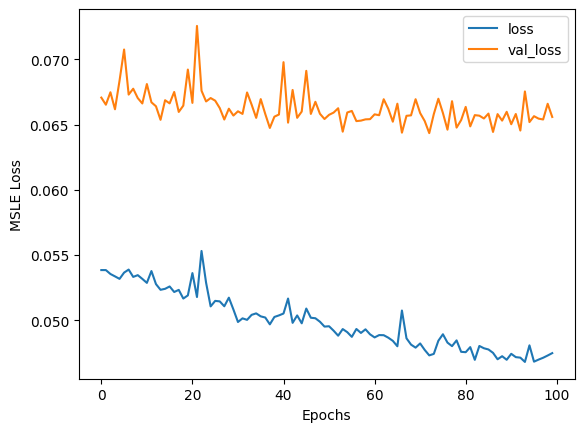

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()